## CREATING TEST AND TRAIN DATA

In [ ]:
# The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

In [ ]:
# About this Dataset
# The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

# The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest. To create new data, an image pipeline was used based on ImageMagick and included cropping to hands-only, gray-scaling, resizing, and then creating at least 50+ variations to enlarge the quantity. The modification and expansion strategy was filters ('Mitchell', 'Robidoux', 'Catrom', 'Spline', 'Hermite'), along with 5% random pixelation, +/- 15% brightness/contrast, and finally 3 degrees rotation. Because of the tiny size of the images, these modifications effectively alter the resolution and class separation in interesting, controllable ways.

# This dataset was inspired by the Fashion-MNIST 2 and the machine learning pipeline for gestures by Sreehari 4.

# A robust visual recognition algorithm could provide not only new benchmarks that challenge modern machine learning methods such as Convolutional Neural Nets but also could pragmatically help the deaf and hard-of-hearing better communicate using computer vision applications. The National Institute on Deafness and other Communications Disorders (NIDCD) indicates that the 200-year-old American Sign Language is a complete, complex language (of which letter gestures are only part) but is the primary language for many deaf North Americans. ASL is the leading minority language in the U.S. after the "big four": Spanish, Italian, German, and French. One could implement computer vision in an inexpensive board computer like Raspberry Pi with OpenCV, and some Text-to-Speech to enabling improved and automated translation applications.

# Input (105.8 MB)
# #

In [ ]:
import pandas as pd
import numpy as np
train_data_df = pd.read_csv(r"/content/training.csv", header = None)
test_data_df = pd.read_csv(r"/content/testing.csv", header = None)

In [ ]:
cols_in_data = ['label'] + [f'pixel{i}' for i in range(1,10001)]
train_data_df.columns = cols_in_data
test_data_df.columns = cols_in_data

In [ ]:
train_data_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,pixel10000
0,0,29,29,29,29,29,28,29,29,29,...,146,146,147,147,147,146,145,145,144,143
1,0,209,206,206,207,208,209,207,206,207,...,167,167,168,166,165,165,164,165,163,161
2,0,29,29,29,29,30,28,29,30,28,...,165,164,165,164,162,161,160,161,163,162
3,0,29,133,207,210,210,210,209,208,208,...,180,178,177,176,175,173,172,172,171,171
4,0,28,29,28,29,29,29,29,29,29,...,145,145,146,146,144,144,143,140,140,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,25,31,29,29,29,29,30,29,29,29,...,98,98,98,98,98,99,99,100,100,63
344,25,30,30,29,30,29,29,29,29,29,...,67,68,68,68,67,67,67,67,68,48
345,25,182,183,182,182,181,181,182,183,183,...,66,68,69,68,67,66,66,66,67,67
346,25,135,133,131,128,122,118,112,111,114,...,66,66,66,66,67,66,67,66,66,46


In [ ]:
test_data_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,pixel10000
0,0,30,30,28,30,29,30,29,29,29,...,80,80,80,80,81,81,82,81,81,57
1,1,29,30,29,30,30,29,29,29,29,...,87,88,87,87,87,86,86,84,84,56
2,2,30,29,29,29,30,30,28,29,29,...,92,92,91,90,91,89,90,89,87,58
3,26,30,30,30,28,29,29,28,29,29,...,67,67,67,63,56,52,52,52,50,39
4,3,30,30,29,30,30,29,29,29,29,...,94,94,93,93,93,92,92,92,90,60
5,4,31,29,29,29,29,30,30,29,29,...,88,88,88,88,88,87,87,87,86,57
6,5,29,31,30,29,30,30,29,29,29,...,83,83,82,82,81,82,80,79,78,54
7,6,30,31,29,29,29,29,29,29,29,...,34,35,36,36,36,36,38,40,44,37
8,7,31,30,29,29,29,28,29,29,29,...,70,68,63,49,44,42,41,41,41,36
9,8,30,29,30,28,29,29,29,29,29,...,76,76,76,75,75,75,75,75,75,52


In [ ]:
# train_data_df[train_data_df.label == 9]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,pixel10000
120,9,31,31,28,29,28,29,29,28,29,...,37,37,38,38,38,37,39,39,38,35
121,9,29,178,199,199,197,201,196,196,196,...,158,158,157,155,156,156,153,151,150,149
122,9,30,105,109,110,114,113,105,112,111,...,137,140,141,140,141,144,146,145,146,149
123,9,31,30,29,29,29,29,28,29,30,...,66,65,63,63,63,63,67,71,77,54
124,9,30,29,29,30,29,28,29,29,28,...,44,45,44,44,44,44,45,46,47,49
125,9,29,29,29,29,29,29,29,29,30,...,54,53,51,54,57,58,62,66,93,131
126,9,30,30,30,29,29,30,29,30,29,...,118,119,119,119,119,121,123,123,123,75
127,9,28,28,28,29,29,29,29,29,29,...,22,20,19,19,20,21,23,23,23,28
128,9,29,29,29,29,29,29,30,28,29,...,48,48,46,46,48,47,47,47,45,46
129,9,30,29,29,30,29,28,30,29,29,...,119,118,118,118,118,117,119,119,117,117


In [ ]:
# train_data_df[train_data_df.label == 25]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,pixel10000
336,25,30,30,29,30,29,29,28,30,29,...,68,68,68,67,67,67,67,67,68,48
337,25,30,29,30,29,30,29,29,29,30,...,141,141,141,140,140,139,139,139,137,137
338,25,30,75,89,88,90,86,92,91,91,...,124,124,125,123,125,129,130,130,130,130
339,25,80,75,68,62,63,61,60,64,64,...,115,116,116,116,118,118,120,121,121,69
340,25,30,29,30,29,29,30,30,29,30,...,68,68,68,68,68,67,68,68,68,47
341,25,32,29,30,29,29,28,29,29,29,...,124,126,126,127,126,126,127,128,127,78
342,25,87,90,85,87,88,88,92,94,88,...,92,93,93,93,93,94,93,94,93,94
343,25,31,29,29,29,29,30,29,29,29,...,98,98,98,98,98,99,99,100,100,63
344,25,30,30,29,30,29,29,29,29,29,...,67,68,68,68,67,67,67,67,68,48
345,25,182,183,182,182,181,181,182,183,183,...,66,68,69,68,67,66,66,66,67,67


In [ ]:
# train_data_df = train_data_df[train_data_df['label'] != 9]
# train_data_df = train_data_df[train_data_df['label'] != 25]

In [ ]:
train_data_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,pixel10000
0,0,29,29,29,29,29,28,29,29,29,...,146,146,147,147,147,146,145,145,144,143
1,0,209,206,206,207,208,209,207,206,207,...,167,167,168,166,165,165,164,165,163,161
2,0,29,29,29,29,30,28,29,30,28,...,165,164,165,164,162,161,160,161,163,162
3,0,29,133,207,210,210,210,209,208,208,...,180,178,177,176,175,173,172,172,171,171
4,0,28,29,28,29,29,29,29,29,29,...,145,145,146,146,144,144,143,140,140,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,25,31,29,29,29,29,30,29,29,29,...,98,98,98,98,98,99,99,100,100,63
344,25,30,30,29,30,29,29,29,29,29,...,67,68,68,68,67,67,67,67,68,48
345,25,182,183,182,182,181,181,182,183,183,...,66,68,69,68,67,66,66,66,67,67
346,25,135,133,131,128,122,118,112,111,114,...,66,66,66,66,67,66,67,66,66,46


In [ ]:
# train_data_df['label'] = train_data_df['label'].apply(lambda x: x - 1 if x > 9 else x)

<ipython-input-53-b3f32e66f440>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_df['label'] = train_data_df['label'].apply(lambda x: x - 1 if x > 9 else x)


In [ ]:
train_data_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,pixel10000
0,0,29,29,29,29,29,28,29,29,29,...,146,146,147,147,147,146,145,145,144,143
1,0,209,206,206,207,208,209,207,206,207,...,167,167,168,166,165,165,164,165,163,161
2,0,29,29,29,29,30,28,29,30,28,...,165,164,165,164,162,161,160,161,163,162
3,0,29,133,207,210,210,210,209,208,208,...,180,178,177,176,175,173,172,172,171,171
4,0,28,29,28,29,29,29,29,29,29,...,145,145,146,146,144,144,143,140,140,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,25,31,29,29,29,29,30,29,29,29,...,98,98,98,98,98,99,99,100,100,63
344,25,30,30,29,30,29,29,29,29,29,...,67,68,68,68,67,67,67,67,68,48
345,25,182,183,182,182,181,181,182,183,183,...,66,68,69,68,67,66,66,66,67,67
346,25,135,133,131,128,122,118,112,111,114,...,66,66,66,66,67,66,67,66,66,46


In [ ]:
# test_data_df['label'] = test_data_df['label'].apply(lambda x: x - 1 if x > 9 else x)

In [ ]:
test_data_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,pixel10000
0,0,30,30,28,30,29,30,29,29,29,...,80,80,80,80,81,81,82,81,81,57
1,1,29,30,29,30,30,29,29,29,29,...,87,88,87,87,87,86,86,84,84,56
2,2,30,29,29,29,30,30,28,29,29,...,92,92,91,90,91,89,90,89,87,58
3,26,30,30,30,28,29,29,28,29,29,...,67,67,67,63,56,52,52,52,50,39
4,3,30,30,29,30,30,29,29,29,29,...,94,94,93,93,93,92,92,92,90,60
5,4,31,29,29,29,29,30,30,29,29,...,88,88,88,88,88,87,87,87,86,57
6,5,29,31,30,29,30,30,29,29,29,...,83,83,82,82,81,82,80,79,78,54
7,6,30,31,29,29,29,29,29,29,29,...,34,35,36,36,36,36,38,40,44,37
8,7,31,30,29,29,29,28,29,29,29,...,70,68,63,49,44,42,41,41,41,36
9,8,30,29,30,28,29,29,29,29,29,...,76,76,76,75,75,75,75,75,75,52


In [ ]:
x_train_df = train_data_df.iloc[: , 1:]


In [ ]:
x_train_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,pixel10000
0,29,29,29,29,29,28,29,29,29,29,...,146,146,147,147,147,146,145,145,144,143
1,209,206,206,207,208,209,207,206,207,207,...,167,167,168,166,165,165,164,165,163,161
2,29,29,29,29,30,28,29,30,28,29,...,165,164,165,164,162,161,160,161,163,162
3,29,133,207,210,210,210,209,208,208,208,...,180,178,177,176,175,173,172,172,171,171
4,28,29,28,29,29,29,29,29,29,29,...,145,145,146,146,144,144,143,140,140,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,31,29,29,29,29,30,29,29,29,29,...,98,98,98,98,98,99,99,100,100,63
344,30,30,29,30,29,29,29,29,29,29,...,67,68,68,68,67,67,67,67,68,48
345,182,183,182,182,181,181,182,183,183,184,...,66,68,69,68,67,66,66,66,67,67
346,135,133,131,128,122,118,112,111,114,113,...,66,66,66,66,67,66,67,66,66,46


In [ ]:
y_train_df = train_data_df.iloc[: , :1]

In [ ]:
y_train_df

,label
0,0
1,0
2,0
3,0
4,0
...,...
343,25
344,25
345,25
346,25


In [ ]:
max(y_train_df['label'])

28

In [ ]:
min(y_train_df['label'])

0

In [ ]:
x_test_df = test_data_df.iloc[: , 1:]


In [ ]:
x_test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,pixel10000
0,30,30,28,30,29,30,29,29,29,29,...,80,80,80,80,81,81,82,81,81,57
1,29,30,29,30,30,29,29,29,29,29,...,87,88,87,87,87,86,86,84,84,56
2,30,29,29,29,30,30,28,29,29,29,...,92,92,91,90,91,89,90,89,87,58
3,30,30,30,28,29,29,28,29,29,29,...,67,67,67,63,56,52,52,52,50,39
4,30,30,29,30,30,29,29,29,29,30,...,94,94,93,93,93,92,92,92,90,60
5,31,29,29,29,29,30,30,29,29,30,...,88,88,88,88,88,87,87,87,86,57
6,29,31,30,29,30,30,29,29,29,29,...,83,83,82,82,81,82,80,79,78,54
7,30,31,29,29,29,29,29,29,29,29,...,34,35,36,36,36,36,38,40,44,37
8,31,30,29,29,29,28,29,29,29,29,...,70,68,63,49,44,42,41,41,41,36
9,30,29,30,28,29,29,29,29,29,29,...,76,76,76,75,75,75,75,75,75,52


In [ ]:
y_test_df = test_data_df.iloc[: , :1]

In [ ]:
y_test_df

,label
0,0
1,1
2,2
3,26
4,3
5,4
6,5
7,6
8,7
9,8


In [ ]:
print(x_train_df.shape)
print(y_train_df.shape)
print(x_test_df.shape)
print(y_test_df.shape)

(348, 10000)
(348, 1)
(29, 10000)
(29, 1)


In [ ]:
# Normalize the data (greyscale normalization for faster convergence)
x_train_df = x_train_df/255
x_test_df = x_test_df/255



In [ ]:
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName("create spark df").getOrCreate()

In [ ]:

# spark_x_train_df = spark.createDataFrame(x_train_df)

In [ ]:
# spark_x_train_df

DataFrame[pixel1: double, pixel2: double, pixel3: double, pixel4: double, pixel5: double, pixel6: double, pixel7: double, pixel8: double, pixel9: double, pixel10: double, pixel11: double, pixel12: double, pixel13: double, pixel14: double, pixel15: double, pixel16: double, pixel17: double, pixel18: double, pixel19: double, pixel20: double, pixel21: double, pixel22: double, pixel23: double, pixel24: double, pixel25: double, pixel26: double, pixel27: double, pixel28: double, pixel29: double, pixel30: double, pixel31: double, pixel32: double, pixel33: double, pixel34: double, pixel35: double, pixel36: double, pixel37: double, pixel38: double, pixel39: double, pixel40: double, pixel41: double, pixel42: double, pixel43: double, pixel44: double, pixel45: double, pixel46: double, pixel47: double, pixel48: double, pixel49: double, pixel50: double, pixel51: double, pixel52: double, pixel53: double, pixel54: double, pixel55: double, pixel56: double, pixel57: double, pixel58: double, pixel59: doub

In [ ]:
x_train_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,pixel10000
0,0.113725,0.113725,0.113725,0.113725,0.113725,0.109804,0.113725,0.113725,0.113725,0.113725,...,0.572549,0.572549,0.576471,0.576471,0.576471,0.572549,0.568627,0.568627,0.564706,0.560784
1,0.819608,0.807843,0.807843,0.811765,0.815686,0.819608,0.811765,0.807843,0.811765,0.811765,...,0.654902,0.654902,0.658824,0.650980,0.647059,0.647059,0.643137,0.647059,0.639216,0.631373
2,0.113725,0.113725,0.113725,0.113725,0.117647,0.109804,0.113725,0.117647,0.109804,0.113725,...,0.647059,0.643137,0.647059,0.643137,0.635294,0.631373,0.627451,0.631373,0.639216,0.635294
3,0.113725,0.521569,0.811765,0.823529,0.823529,0.823529,0.819608,0.815686,0.815686,0.815686,...,0.705882,0.698039,0.694118,0.690196,0.686275,0.678431,0.674510,0.674510,0.670588,0.670588
4,0.109804,0.113725,0.109804,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,...,0.568627,0.568627,0.572549,0.572549,0.564706,0.564706,0.560784,0.549020,0.549020,0.549020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.121569,0.113725,0.113725,0.113725,0.113725,0.117647,0.113725,0.113725,0.113725,0.113725,...,0.384314,0.384314,0.384314,0.384314,0.384314,0.388235,0.388235,0.392157,0.392157,0.247059
344,0.117647,0.117647,0.113725,0.117647,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,...,0.262745,0.266667,0.266667,0.266667,0.262745,0.262745,0.262745,0.262745,0.266667,0.188235
345,0.713725,0.717647,0.713725,0.713725,0.709804,0.709804,0.713725,0.717647,0.717647,0.721569,...,0.258824,0.266667,0.270588,0.266667,0.262745,0.258824,0.258824,0.258824,0.262745,0.262745
346,0.529412,0.521569,0.513725,0.501961,0.478431,0.462745,0.439216,0.435294,0.447059,0.443137,...,0.258824,0.258824,0.258824,0.258824,0.262745,0.258824,0.262745,0.258824,0.258824,0.180392


In [ ]:
x_test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,pixel10000
0,0.117647,0.117647,0.109804,0.117647,0.113725,0.117647,0.113725,0.113725,0.113725,0.113725,...,0.313725,0.313725,0.313725,0.313725,0.317647,0.317647,0.321569,0.317647,0.317647,0.223529
1,0.113725,0.117647,0.113725,0.117647,0.117647,0.113725,0.113725,0.113725,0.113725,0.113725,...,0.341176,0.345098,0.341176,0.341176,0.341176,0.337255,0.337255,0.329412,0.329412,0.219608
2,0.117647,0.113725,0.113725,0.113725,0.117647,0.117647,0.109804,0.113725,0.113725,0.113725,...,0.360784,0.360784,0.356863,0.352941,0.356863,0.349020,0.352941,0.349020,0.341176,0.227451
3,0.117647,0.117647,0.117647,0.109804,0.113725,0.113725,0.109804,0.113725,0.113725,0.113725,...,0.262745,0.262745,0.262745,0.247059,0.219608,0.203922,0.203922,0.203922,0.196078,0.152941
4,0.117647,0.117647,0.113725,0.117647,0.117647,0.113725,0.113725,0.113725,0.113725,0.117647,...,0.368627,0.368627,0.364706,0.364706,0.364706,0.360784,0.360784,0.360784,0.352941,0.235294
5,0.121569,0.113725,0.113725,0.113725,0.113725,0.117647,0.117647,0.113725,0.113725,0.117647,...,0.345098,0.345098,0.345098,0.345098,0.345098,0.341176,0.341176,0.341176,0.337255,0.223529
6,0.113725,0.121569,0.117647,0.113725,0.117647,0.117647,0.113725,0.113725,0.113725,0.113725,...,0.325490,0.325490,0.321569,0.321569,0.317647,0.321569,0.313725,0.309804,0.305882,0.211765
7,0.117647,0.121569,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,...,0.133333,0.137255,0.141176,0.141176,0.141176,0.141176,0.149020,0.156863,0.172549,0.145098
8,0.121569,0.117647,0.113725,0.113725,0.113725,0.109804,0.113725,0.113725,0.113725,0.113725,...,0.274510,0.266667,0.247059,0.192157,0.172549,0.164706,0.160784,0.160784,0.160784,0.141176
9,0.117647,0.113725,0.117647,0.109804,0.113725,0.113725,0.113725,0.113725,0.113725,0.113725,...,0.298039,0.298039,0.298039,0.294118,0.294118,0.294118,0.294118,0.294118,0.294118,0.203922


In [ ]:
y_train_df

,label
0,0
1,0
2,0
3,0
4,0
...,...
343,25
344,25
345,25
346,25


In [ ]:
y_test_df

,label
0,0
1,1
2,2
3,26
4,3
5,4
6,5
7,6
8,7
9,8


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_df, y_train_df, test_size = 0.3, random_state = 42)

In [ ]:
#dataframe to numpy
x_train = x_train_df.values
y_train = y_train_df.values
x_val = x_train_df.values
y_val = y_train_df.values
x_test = x_test_df.values
y_test = y_test_df.values

In [ ]:
y_train

array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],

In [ ]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,100,100,1)
x_val = x_val.reshape(-1,100,100,1)
x_test = x_test.reshape(-1,100,100,1)

In [ ]:
x_train.shape

(348, 100, 100, 1)

In [ ]:
x_train.shape[0]

348

In [ ]:
x_train[0].shape

(100, 100, 1)

In [ ]:
x_train[0]

array([[[0.11372549],
        [0.11372549],
        [0.11372549],
        ...,
        [0.10980392],
        [0.10980392],
        [0.11372549]],

       [[0.2745098 ],
        [0.28627451],
        [0.29803922],
        ...,
        [0.66666667],
        [0.67843137],
        [0.67058824]],

       [[0.2       ],
        [0.19607843],
        [0.21568627],
        ...,
        [0.72156863],
        [0.70980392],
        [0.69019608]],

       ...,

       [[0.56470588],
        [0.56862745],
        [0.57254902],
        ...,
        [0.57254902],
        [0.57254902],
        [0.56862745]],

       [[0.56470588],
        [0.56862745],
        [0.56862745],
        ...,
        [0.56862745],
        [0.56862745],
        [0.56470588]],

       [[0.55686275],
        [0.56078431],
        [0.56470588],
        ...,
        [0.56862745],
        [0.56470588],
        [0.56078431]]])

In [ ]:
y_train.shape

(348, 1)

In [ ]:
y_test.shape

(29, 1)

In [ ]:
# class_names = ['A','B','C','D','E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

In [ ]:
class_names = ['A','B','C','D','E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'Del', 'N', 'Space']

In [ ]:
class_names[28]

'Space'

In [ ]:
len(class_names)

29

In [ ]:
# class_names_datawise = ['A','B','C','D','E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

In [ ]:
# len(class_names_datawise)

25

In [ ]:
y_train

array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [26],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],

In [ ]:
class_names[int(y_train[1])]

'A'

In [ ]:
int(y_train[1])

0

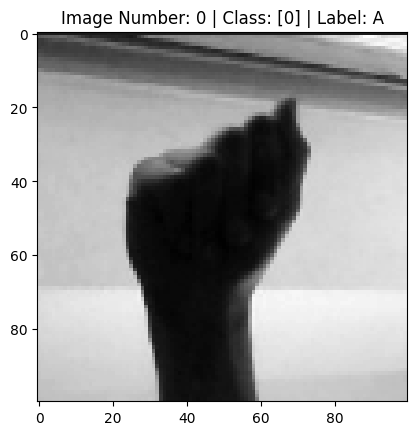

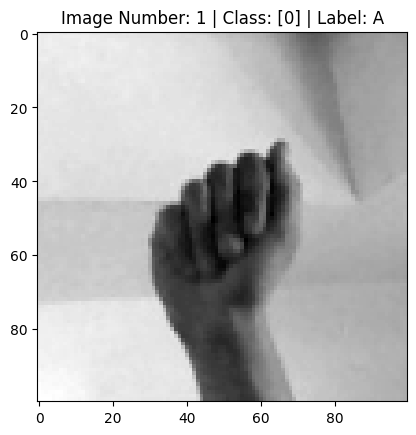

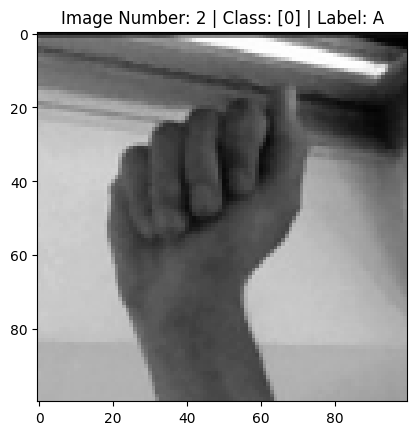

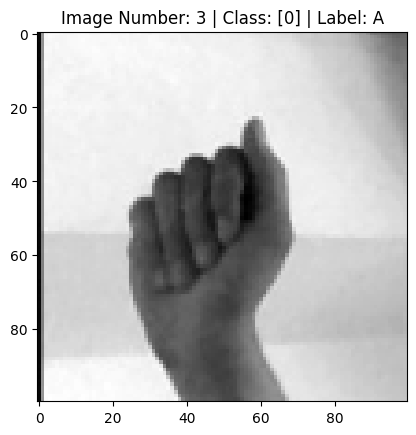

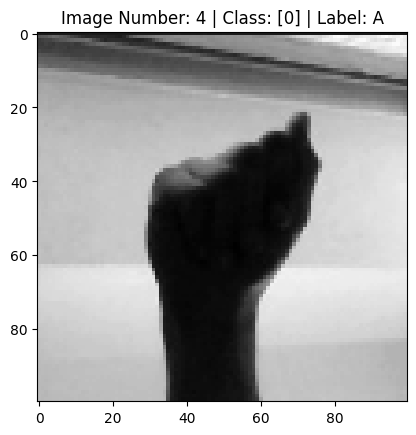

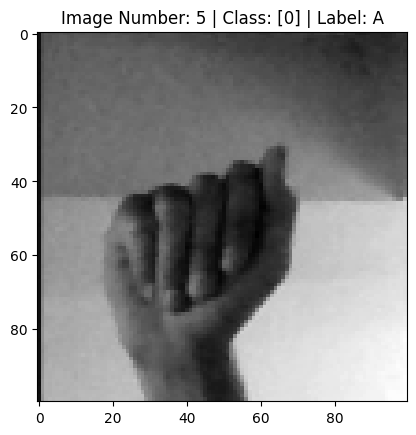

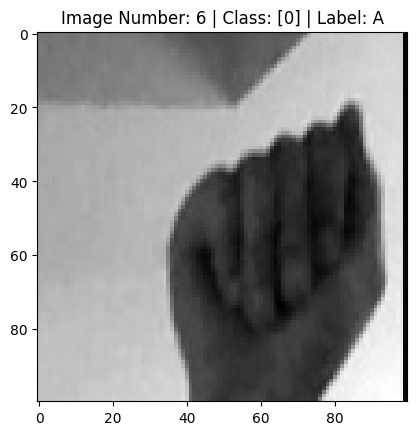

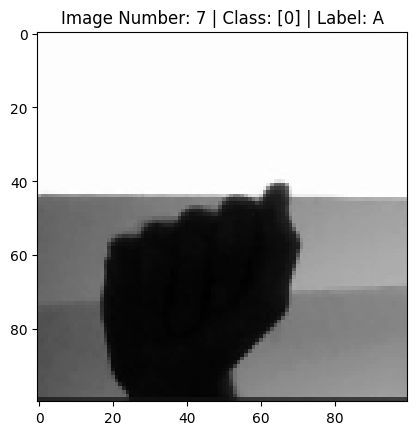

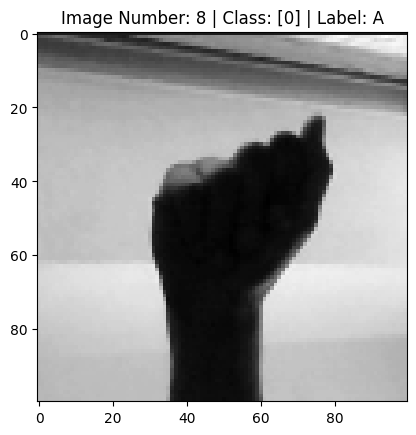

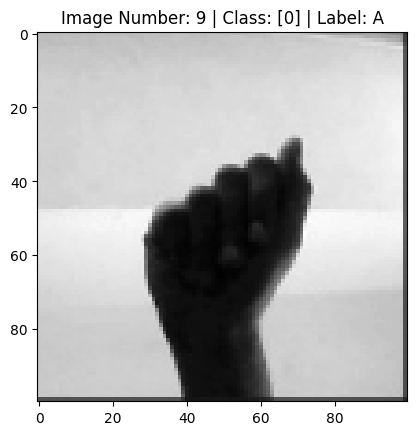

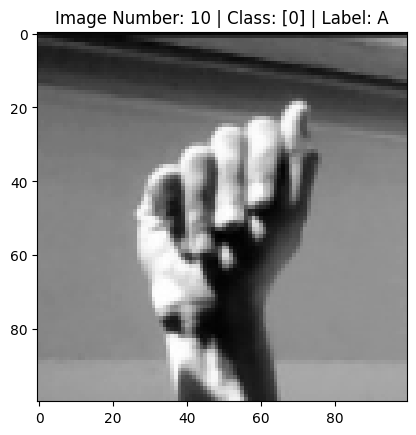

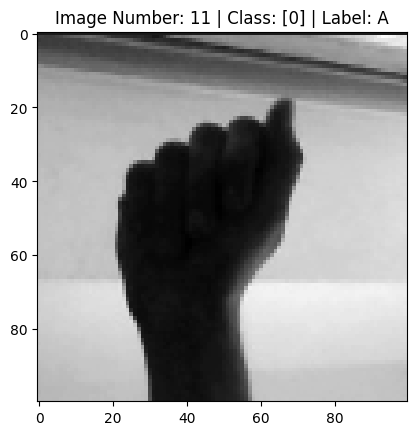

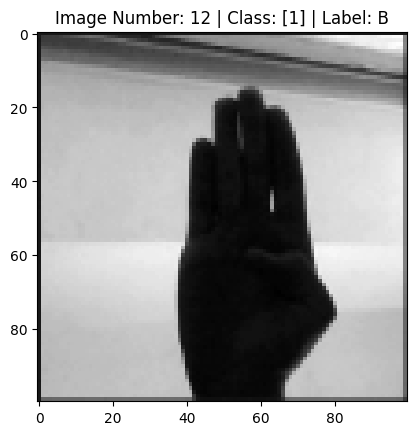

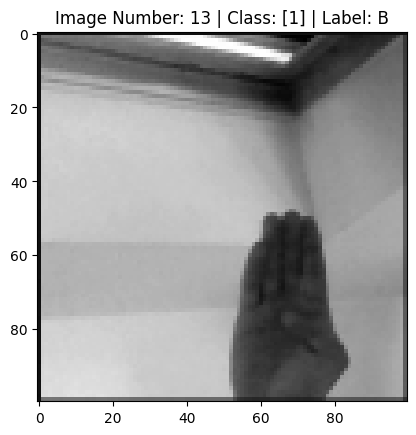

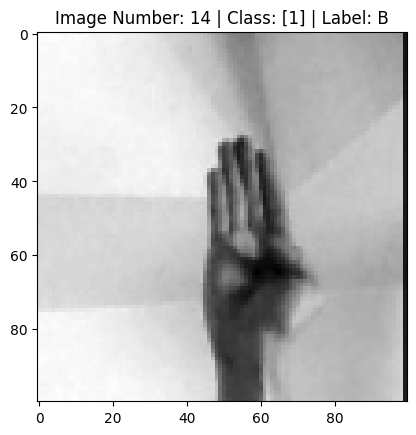

In [ ]:
import matplotlib.pyplot as plt

for i in range(15):
    plt.imshow(x_train[i], cmap='gray')  #can add subplotting here later
    plt.title(f"Image Number: {i} | Class: {str(y_train[i])} | Label: {class_names[int(y_train[i])]}") #add 2 in image number to see that row in excel sheet data
    plt.show()

In [ ]:
class_names[20]

'U'

In [ ]:
len(class_names)

28

## DATA PREPARATION

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train_lb = label_binarizer.fit_transform(y_train)
y_val_lb = label_binarizer.fit_transform(y_val)
y_test_lb = label_binarizer.fit_transform(y_test)

In [ ]:
y_train.shape

(348, 1)

In [ ]:
# from tensorflow.keras.utils import to_categorical
# y_train_ohe = to_categorical(y_train)
# y_test_ohe = to_categorical(y_test)

In [ ]:
np.max(y_train)

28

In [ ]:
np.min(y_train)

0

In [ ]:
y_train_lb

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(x_train.shape)
print(y_train_lb.shape)
print(x_val.shape)
print(y_val_lb.shape)
print(x_test.shape)
print(y_test_lb.shape)

(348, 100, 100, 1)
(348, 29)
(348, 100, 100, 1)
(348, 29)
(29, 100, 100, 1)
(29, 29)


## can even add data augmentation here

## MODEL BUILDING

In [ ]:
# import tensorflow as tf
# import keras
# from tensorflow.keras import layers, models
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# model = Sequential()
# model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Flatten())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.20))

# model.add(Dense(24, activation = 'softmax'))

In [ ]:
# model.summary()

In [ ]:
# model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
#               metrics=['accuracy'])

In [ ]:
# batch_size = 128
# epochs = 50

In [ ]:
# history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

In [ ]:
# # plt.plot(history.history['acc'])
# # plt.plot(history.history['val_acc'])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title("Accuracy")
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.legend(['train','test'])

# plt.show()

In [ ]:
# MODEL BUIDLING AGAIN

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, Activation, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(filters =32, kernel_size= (3,3), strides = (1,1), padding= "valid"))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =32, kernel_size= (3,3), strides = (1,1), padding= "valid"))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =32, kernel_size= (2,2), strides = (1,1), padding= "valid"))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(29, activation="softmax"))

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer ="adam", metrics=["accuracy"])

In [ ]:
y_test_lb.shape

(29, 29)

In [ ]:
y_test_lb

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
x_train
# print(y_train_lb.shape)
# print(x_val.shape)
# print(y_val_lb.shape)
# print(x_test.shape)
# print(y_test_lb.shape)

array([[[[0.11372549],
         [0.11372549],
         [0.11372549],
         ...,
         [0.10980392],
         [0.10980392],
         [0.11372549]],

        [[0.2745098 ],
         [0.28627451],
         [0.29803922],
         ...,
         [0.66666667],
         [0.67843137],
         [0.67058824]],

        [[0.2       ],
         [0.19607843],
         [0.21568627],
         ...,
         [0.72156863],
         [0.70980392],
         [0.69019608]],

        ...,

        [[0.56470588],
         [0.56862745],
         [0.57254902],
         ...,
         [0.57254902],
         [0.57254902],
         [0.56862745]],

        [[0.56470588],
         [0.56862745],
         [0.56862745],
         ...,
         [0.56862745],
         [0.56862745],
         [0.56470588]],

        [[0.55686275],
         [0.56078431],
         [0.56470588],
         ...,
         [0.56862745],
         [0.56470588],
         [0.56078431]]],


       [[[0.81960784],
         [0.80784314],
         [0.80

In [ ]:
print(x_train.shape)
print(y_train_lb.shape)
print(x_val.shape)
print(y_val_lb.shape)

(348, 100, 100, 1)
(348, 29)
(348, 100, 100, 1)
(348, 29)


In [ ]:
model.fit(x = x_train,
         y = y_train_lb,
         batch_size = 1000,
         validation_data = (x_val, y_val_lb),
         epochs = 95)

Epoch 1/95
1/1 [==============================] - 6s 6s/step - loss: 3.3688 - accuracy: 0.0431 - val_loss: 3.3596 - val_accuracy: 0.0460
Epoch 2/95
1/1 [==============================] - 6s 6s/step - loss: 3.3596 - accuracy: 0.0460 - val_loss: 3.3501 - val_accuracy: 0.0460
Epoch 3/95
1/1 [==============================] - 5s 5s/step - loss: 3.3501 - accuracy: 0.0460 - val_loss: 3.3372 - val_accuracy: 0.0920
Epoch 4/95
1/1 [==============================] - 5s 5s/step - loss: 3.3372 - accuracy: 0.0920 - val_loss: 3.3204 - val_accuracy: 0.0948
Epoch 5/95
1/1 [==============================] - 6s 6s/step - loss: 3.3204 - accuracy: 0.0948 - val_loss: 3.2989 - val_accuracy: 0.1207
Epoch 6/95
1/1 [==============================] - 4s 4s/step - loss: 3.2989 - accuracy: 0.1207 - val_loss: 3.2716 - val_accuracy: 0.1868
Epoch 7/95
1/1 [==============================] - 5s 5s/step - loss: 3.2716 - accuracy: 0.1868 - val_loss: 3.2380 - val_accuracy: 0.2759
Epoch 8/95
1/1 [=========================

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 activation_9 (Activation)   (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 activation_10 (Activation)  (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                

In [ ]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

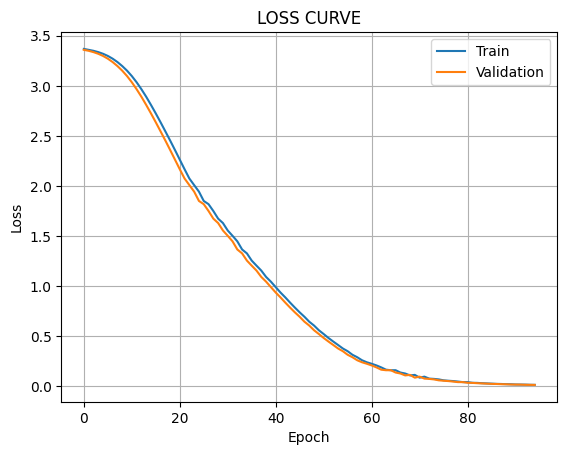

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend((['Train', 'Validation']))
plt.grid()
plt.show()

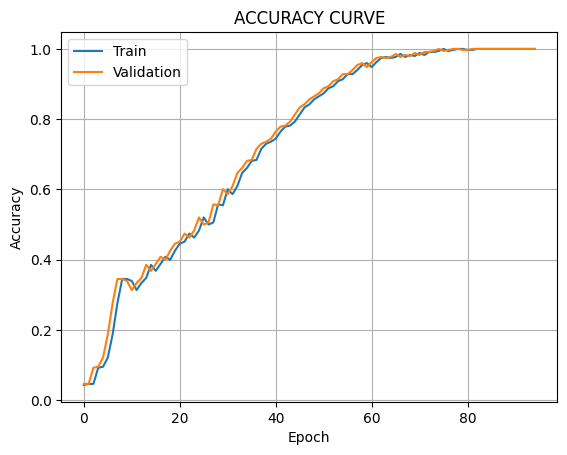

In [ ]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend((['Train', 'Validation']))
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
preds = model.predict(x_test)
preds_class = np.argmax(preds, axis =1)
preds.shape

1/1 [==============================] - 0s 171ms/step


(29, 29)

In [ ]:
y_test.shape

(29, 1)

In [ ]:
y_test

array([[ 0],
       [ 1],
       [ 2],
       [26],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [27],
       [13],
       [14],
       [15],
       [16],
       [17],
       [28],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25]])

In [ ]:
y_test[1][0]

1

In [ ]:
max(y_test)

array([28])

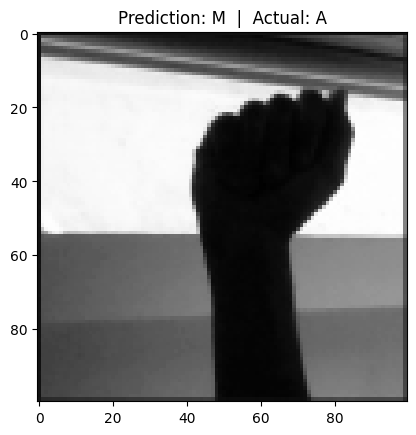

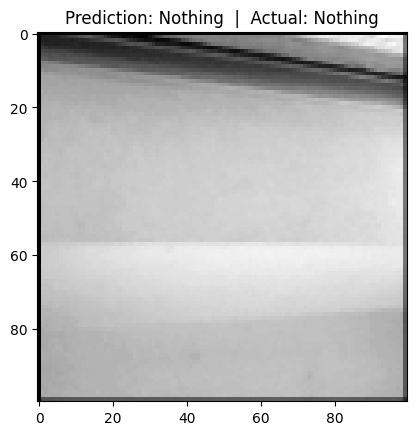

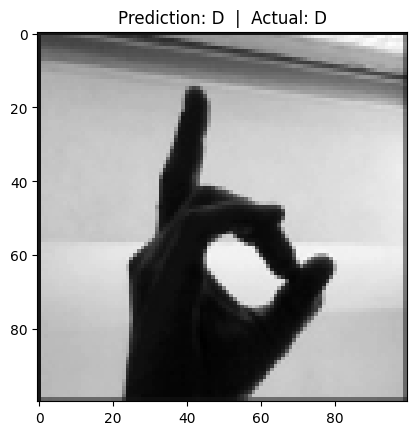

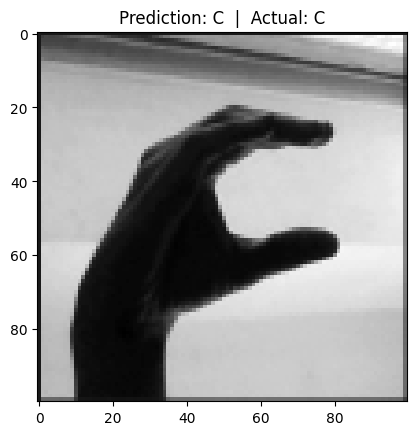

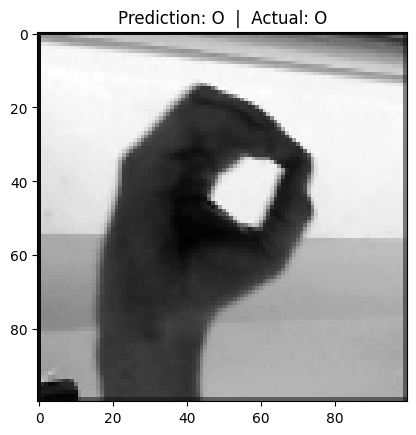

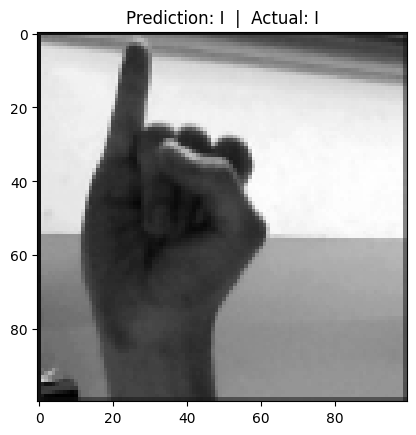

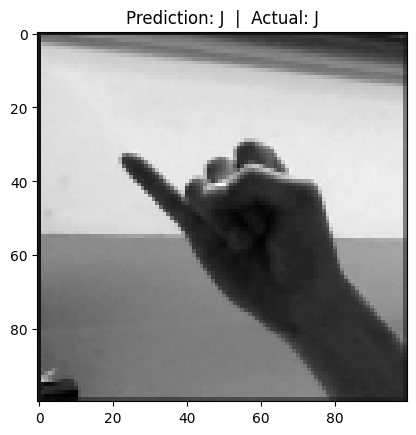

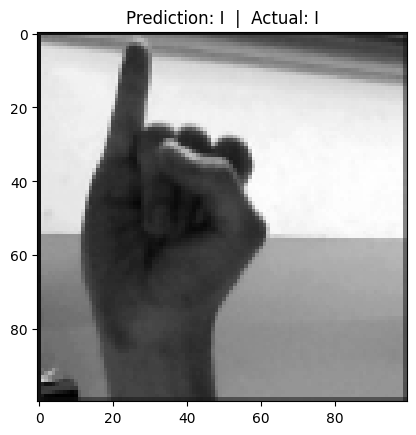

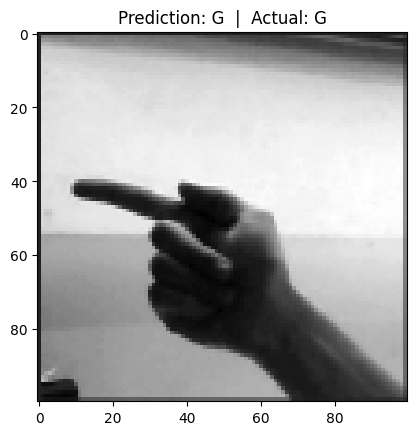

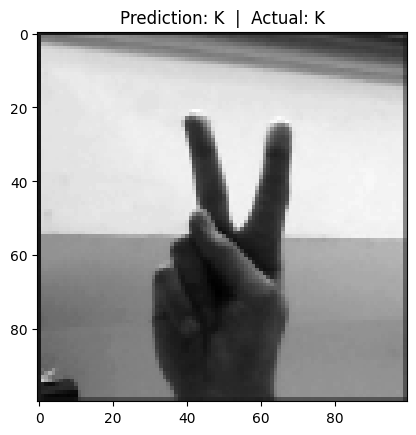

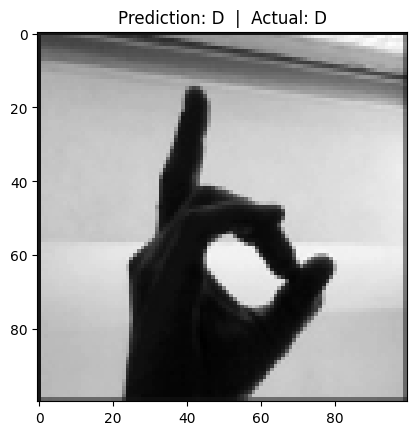

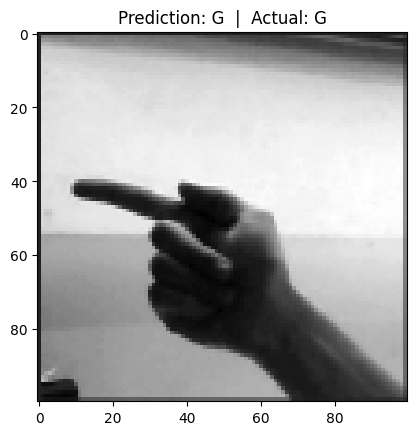

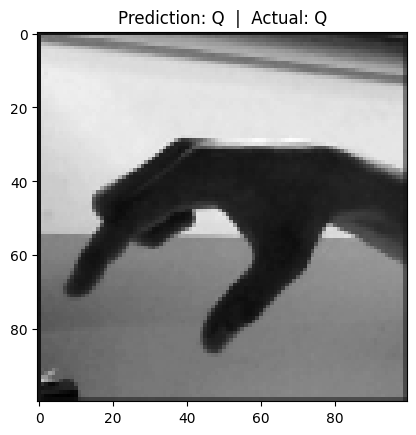

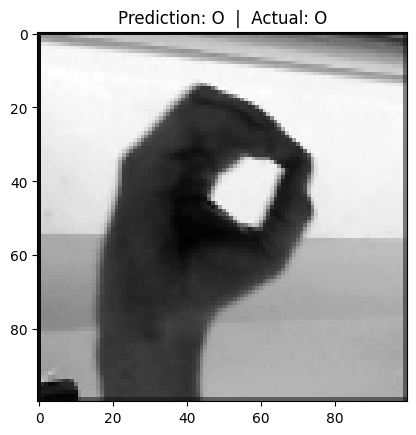

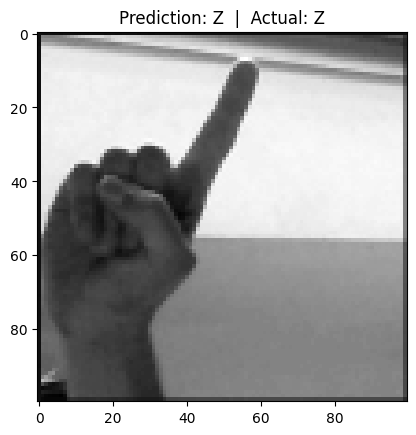

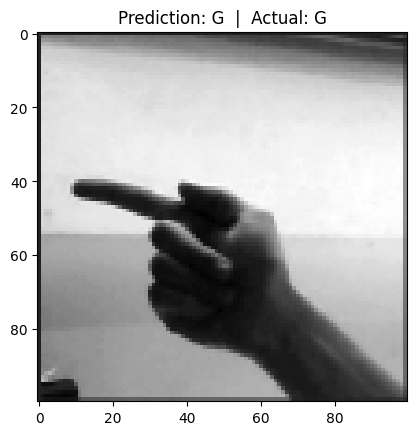

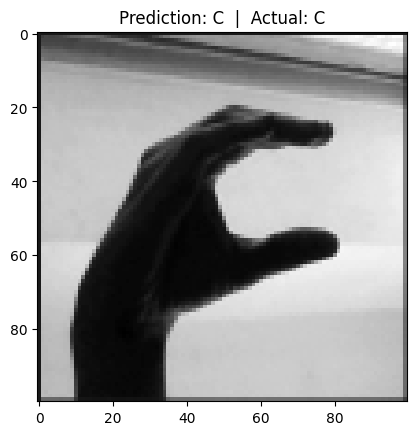

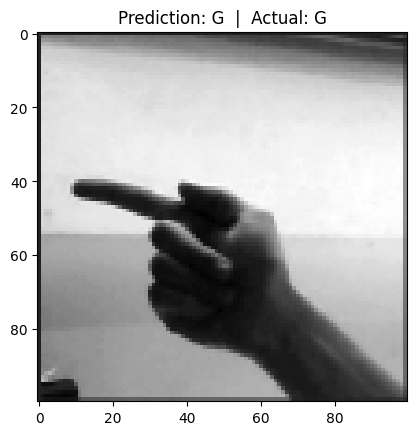

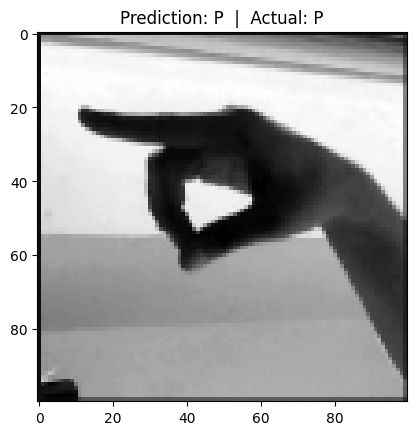

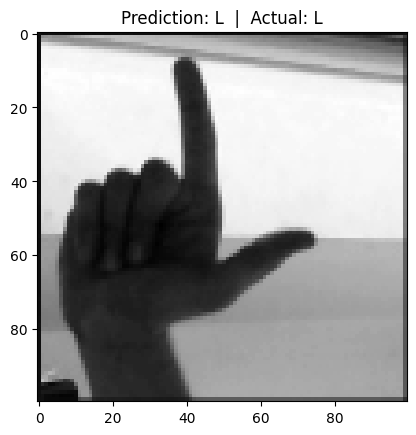

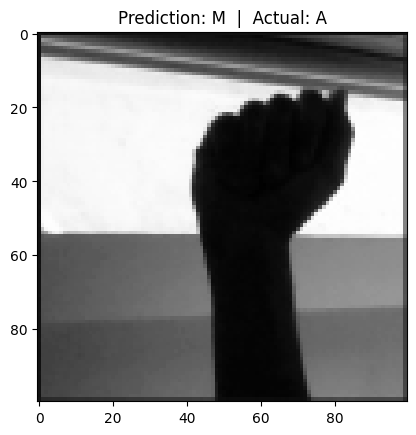

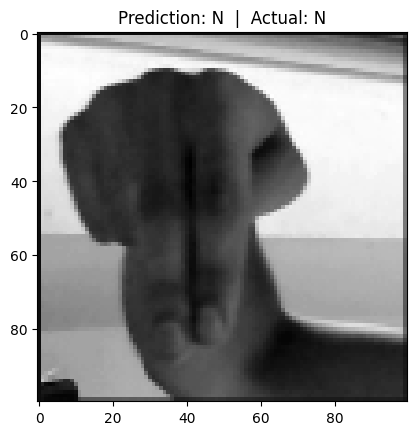

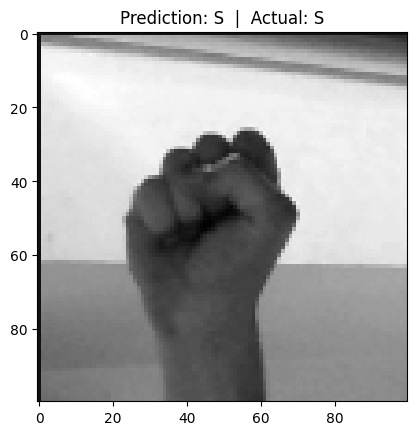

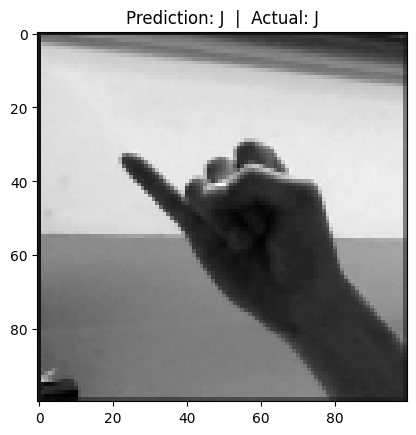

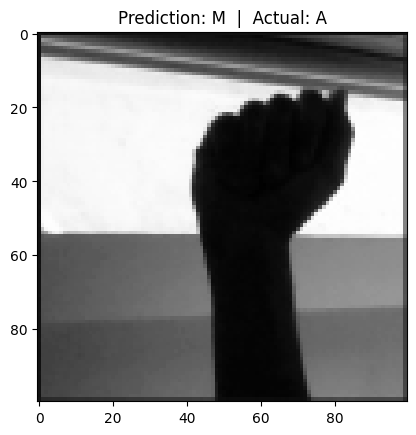

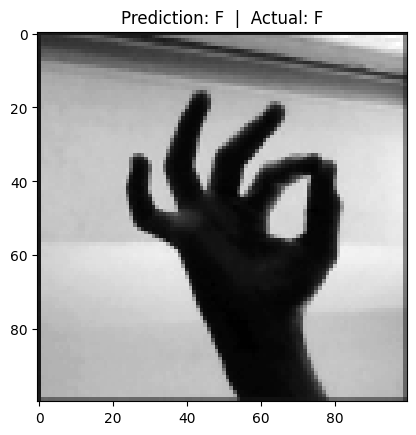

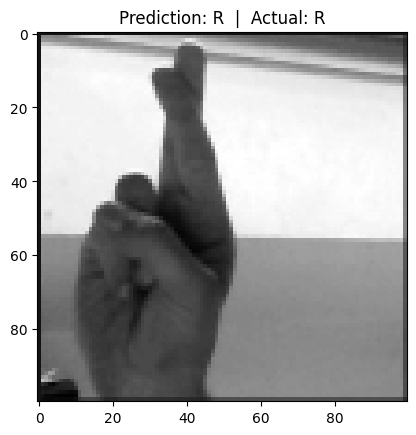

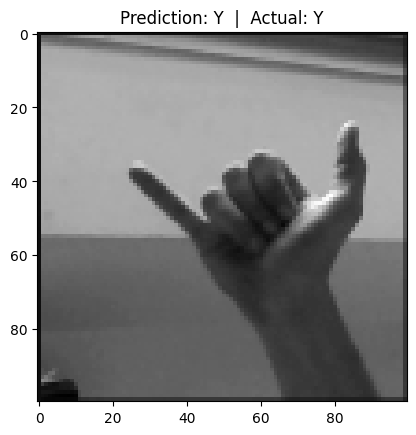

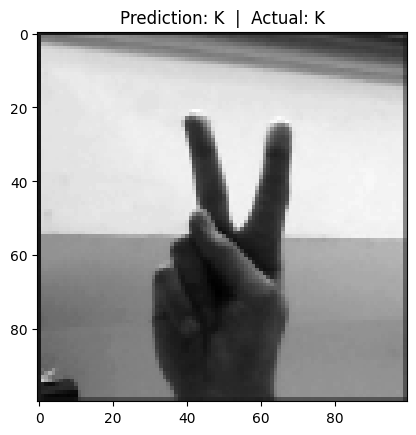

In [ ]:
imgs = np.random.randint(0,29, 29)

for n in imgs:
  plt.imshow(x_test[n].reshape(100,100), cmap="gray")
  plt.title(f"Prediction: {class_names[np.argmax(preds[n])]}  |  Actual: {class_names[y_test[n][0]]}")
  plt.show()

In [ ]:
imgs

array([15, 27,  9,  7, 10, 24, 16, 19,  0, 16])

In [ ]:
preds_class.shape

(29,)

In [ ]:
y_test

array([[ 0],
       [ 1],
       [ 2],
       [26],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [27],
       [13],
       [14],
       [15],
       [16],
       [17],
       [28],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25]])

In [ ]:
print(conf_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = preds_class)
print(pd.DataFrame(conf_matrix, columns = class_names, index = class_names))

       A  B  C  D  E  F  G  H  I  J  ...  T  U  V  W  X  Y  Z  Del  N  Space
A      0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0    0  0      0
B      0  1  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0    0  0      0
C      0  0  1  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0    0  0      0
D      0  0  0  1  0  0  0  0  0  0  ...  0  0  0  0  0  0  0    0  0      0
E      0  0  0  0  1  0  0  0  0  0  ...  0  0  0  0  0  0  0    0  0      0
F      0  0  0  0  0  1  0  0  0  0  ...  0  0  0  0  0  0  0    0  0      0
G      0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  0    0  0      0
H      0  0  0  0  0  0  0  1  0  0  ...  0  0  0  0  0  0  0    0  0      0
I      0  0  0  0  0  0  0  0  1  0  ...  0  0  0  0  0  0  0    0  0      0
J      0  0  0  0  0  0  0  0  0  1  ...  0  0  0  0  0  0  0    0  0      0
K      0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0    0  0      0
L      0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0    0  0      0

In [ ]:
print(classification_report(y_true = y_test, y_pred = preds_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       0.50      1.00      0.67         1
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
############################################################################################################

In [ ]:
###################################### FINISHED #####################################################################

In [ ]:
###############################################################################################################

In [ ]:
###################################################################################################

In [ ]:
#####################################################################################################

In [ ]:
#trying sparkML now (RANDOM FOREST MODEL)

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession, types
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

In [ ]:
spark = SparkSession.builder.appName("SignLanguageClassifier").getOrCreate()

In [ ]:
sign_schema = types.StructType([
    types.StructField('label', types.IntegerType()),
    *[types.StructField(f'pixel{i}', types.IntegerType()) for i in range(1,10001)]
])

In [ ]:
from functools import reduce


data = spark.read.csv(r'/content/training.csv', header = True, schema = sign_schema)
# data = spark.read.csv(r'/content/training.csv', header = False, schema = sign_schema)

# cols_in_data = ['label'] + [f'pixel{i}' for i in range(1,10001)]
# for i, col_name in enumerate(cols_in_data):
#     data = data.withColumnRenamed('_c{}'.format(i), col_name)
# data.columns = cols_in_data

train, validation = data.randomSplit([0.75, 0.25])


# cols_in_data = ['label'] + [f'pixel{i}' for i in range(1, 10001)]
# rename_map = {f'_c{i}': col_name for i, col_name in enumerate(cols_in_data)}
# data = reduce(lambda df, col_rename: df.withColumnRenamed(*col_rename), rename_map.items(), data)
# train, validation = data.randomSplit([0.75, 0.25])

In [ ]:
data.printSchema()

root
 |-- label: integer (nullable = true)
 |-- pixel1: integer (nullable = true)
 |-- pixel2: integer (nullable = true)
 |-- pixel3: integer (nullable = true)
 |-- pixel4: integer (nullable = true)
 |-- pixel5: integer (nullable = true)
 |-- pixel6: integer (nullable = true)
 |-- pixel7: integer (nullable = true)
 |-- pixel8: integer (nullable = true)
 |-- pixel9: integer (nullable = true)
 |-- pixel10: integer (nullable = true)
 |-- pixel11: integer (nullable = true)
 |-- pixel12: integer (nullable = true)
 |-- pixel13: integer (nullable = true)
 |-- pixel14: integer (nullable = true)
 |-- pixel15: integer (nullable = true)
 |-- pixel16: integer (nullable = true)
 |-- pixel17: integer (nullable = true)
 |-- pixel18: integer (nullable = true)
 |-- pixel19: integer (nullable = true)
 |-- pixel20: integer (nullable = true)
 |-- pixel21: integer (nullable = true)
 |-- pixel22: integer (nullable = true)
 |-- pixel23: integer (nullable = true)
 |-- pixel24: integer (nullable = true)
 |-- p

In [ ]:
# data.show(5)

+-----+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---

In [ ]:
features_data_cols = [f"pixel{i}" for i in range(1, 10001)]
features_data_cols

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [ ]:
len(features_data_cols)

10000

In [ ]:
features = VectorAssembler(inputCols = features_data_cols, outputCol = 'features')

In [ ]:
sign_classifier = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')

In [ ]:
sign_pipeline = Pipeline(stages =[features, sign_classifier])

In [ ]:
sign_model = sign_pipeline.fit(train)

Py4JJavaError: ignored

In [ ]:
predictions = sign_model.transform(validation)

In [ ]:
sign_evaluator = MulticlassClassificationEvaluator(labelCol = 'label', predictionCol ='prediction', metricName = 'accuracy')

In [ ]:
sign_accuracy = sign_evaluator.evaluate(predictions)

In [ ]:
print(f"Accuracy: {sign_accuracy}")

Accuracy: 0.5595944967414916


In [ ]:
spark.stop()

In [ ]:
#SPARK ML (MLP model)

In [ ]:
!pip install pyspark

from pyspark.sql import SparkSession, types
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


spark = SparkSession.builder.appName("SignLanguageClassifier").getOrCreate()

sign_schema = types.StructType([
    types.StructField('label', types.IntegerType()),
    *[types.StructField(f'pixel{i}', types.IntegerType()) for i in range(1,10001)]
])

In [ ]:
data = spark.read.csv(r'/content/training.csv', header = True, schema = sign_schema)

In [ ]:
label_col = data.columns[0]

In [ ]:
feature_cols = data.columns[1:]

In [ ]:
assembler = VectorAssembler(inputCols = feature_cols, outputCol = "features")

In [ ]:
assembled_data = assembler.transform(data)
assembled_data = assembled_data.select("features", label_col)

In [ ]:
train, validation = assembled_data.randomSplit([0.75, 0.25])

In [ ]:
first_layer_size = len(features)
last_layer_size = 29

In [ ]:
layers = [first_layer_size, 64, 64, last_layer_size]

In [ ]:
mlp_model = MultilayerPerceptronClassifier(layers = layers, seed =42, maxIter = 95, labelCol = label_col)

In [ ]:
trained_model = mlp_model.fit(train)

Py4JJavaError: ignored

In [ ]:
predictions = trained_model.transform(validation)

In [ ]:
mlp_evaluator = MulticlassClassificationEvaluator(label_col = label_col, predictionCol = "prediction", metricName = "accuracy")

In [ ]:
accuracy = mlp_evaluator(predictions)

In [ ]:
print(accuract)

In [ ]:
spark.stop()